In [1]:
import pandas as pd
from tqdm import tqdm
import re

from stop_words import get_stop_words
stopwords = get_stop_words('russian')

from gensim import corpora, models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
articles_df = pd.read_csv('texts_lemm_meta.tsv', sep = '\t')

In [3]:
articles_df.head()

,path,published,genre,topic,title,date,text
0,diary/2016_2_02_diary_1950.txt,no,diary,everything,Дневник за 1950,1950,дневник р назир декабрь школа миронов чёрный п...
1,diary/2018_1_01_diary_1951.txt,no,diary,everything,Дневник за 1951,1951,январь наш э й й половина го век рим закончить...
2,diary/2016_2_03_diary_1956.txt,no,diary,everything,Дневник за 1956,1956,дневник р назир вложить вырезать газета статья...
3,diary/2016_2_04_diary_1957.txt,no,diary,everything,Дневник за 1957,1957,дневник р назир январь пятница итак кончиться ...
4,diary/2016_3_02_diary_1958.txt,no,diary,everything,Дневник за 1958,1958,дневник р назир январь уфа новый встречать вит...


#### LDA Topic model

In [4]:
articles_df.topic.unique()

array(['everything', 'Dostoevsky', 'literature', 'myth'], dtype=object)

In [19]:
corpus = []
stops = ['свой', 'наш', 'который', 'один', 'самый', 'далее']
stopwords += stops

for text in articles_df.text:
    words = [word for word in re.findall(r'[а-яё]+', text) if word not in stopwords]
    #words = re.findall(r'[а-яё]+', text)
    corpus.extend(words)
    
dictionary = corpora.Dictionary([corpus])

articles_bow = [dictionary.doc2bow(text.split()) for text in articles_df.text]

lda = models.ldamodel.LdaModel(corpus = articles_bow, id2word = dictionary, num_topics = 4, passes=1)

2019-02-26 23:14:07,022 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-26 23:14:07,626 : INFO : built Dictionary(46290 unique tokens: ['оттянуть', 'бровь', 'всезнание', 'золото', 'анхесть']...) from 1 documents (total 559130 corpus positions)
2019-02-26 23:14:08,553 : INFO : using symmetric alpha at 0.25
2019-02-26 23:14:08,557 : INFO : using symmetric eta at 0.25
2019-02-26 23:14:08,578 : INFO : using serial LDA version on this node
2019-02-26 23:14:08,633 : INFO : running online (single-pass) LDA training, 4 topics, 1 passes over the supplied corpus of 110 documents, updating model once every 110 documents, evaluating perplexity every 110 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-26 23:14:08,643 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-26 23:14:10,692 : INFO : -11.383 per-word bound, 2670.8 perplexity estimate based on a held-out 

In [20]:
lda.print_topics(num_topics=4, num_words=25)

2019-02-26 23:14:12,661 : INFO : topic #0 (0.250): 0.006*"достоевский" + 0.004*"роман" + 0.003*"герой" + 0.003*"русский" + 0.002*"пушкин" + 0.002*"любовь" + 0.002*"сюжет" + 0.002*"образ" + 0.002*"миф" + 0.002*"слово" + 0.002*"история" + 0.001*"литература" + 0.001*"век" + 0.001*"дать" + 0.001*"знать" + 0.001*"дело" + 0.001*"тургенев" + 0.001*"новый" + 0.001*"лицо" + 0.001*"сказка" + 0.001*"князь" + 0.001*"рука" + 0.001*"мир" + 0.001*"россия" + 0.001*"писать"
2019-02-26 23:14:12,692 : INFO : topic #1 (0.250): 0.006*"достоевский" + 0.005*"роман" + 0.003*"герой" + 0.002*"русский" + 0.002*"миф" + 0.002*"бог" + 0.002*"знать" + 0.002*"образ" + 0.002*"пушкин" + 0.002*"последний" + 0.002*"новый" + 0.002*"смерть" + 0.002*"слово" + 0.002*"рука" + 0.001*"история" + 0.001*"век" + 0.001*"мир" + 0.001*"сюжет" + 0.001*"дело" + 0.001*"писать" + 0.001*"народ" + 0.001*"стать" + 0.001*"дать" + 0.001*"характер" + 0.001*"идти"
2019-02-26 23:14:12,708 : INFO : topic #2 (0.250): 0.006*"достоевский" + 0.004*"р

[(0,
  '0.006*"достоевский" + 0.004*"роман" + 0.003*"герой" + 0.003*"русский" + 0.002*"пушкин" + 0.002*"любовь" + 0.002*"сюжет" + 0.002*"образ" + 0.002*"миф" + 0.002*"слово" + 0.002*"история" + 0.001*"литература" + 0.001*"век" + 0.001*"дать" + 0.001*"знать" + 0.001*"дело" + 0.001*"тургенев" + 0.001*"новый" + 0.001*"лицо" + 0.001*"сказка" + 0.001*"князь" + 0.001*"рука" + 0.001*"мир" + 0.001*"россия" + 0.001*"писать"'),
 (1,
  '0.006*"достоевский" + 0.005*"роман" + 0.003*"герой" + 0.002*"русский" + 0.002*"миф" + 0.002*"бог" + 0.002*"знать" + 0.002*"образ" + 0.002*"пушкин" + 0.002*"последний" + 0.002*"новый" + 0.002*"смерть" + 0.002*"слово" + 0.002*"рука" + 0.001*"история" + 0.001*"век" + 0.001*"мир" + 0.001*"сюжет" + 0.001*"дело" + 0.001*"писать" + 0.001*"народ" + 0.001*"стать" + 0.001*"дать" + 0.001*"характер" + 0.001*"идти"'),
 (2,
  '0.006*"достоевский" + 0.004*"роман" + 0.004*"герой" + 0.003*"сюжет" + 0.002*"русский" + 0.002*"пушкин" + 0.002*"образ" + 0.002*"бог" + 0.002*"миф" + 0.00

По результатам тематического моделирования не удается выделить темы коллекции текстов. 

#### Clustering

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *
from sklearn.cluster import *
import numpy as np

In [22]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df = 0.9, min_df = 3, stop_words = stopwords, analyzer = 'word')),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', KMeans(n_clusters = 4, random_state = 42))
])


pipeline.fit(articles_df.text)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['а', 'в', ...s=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0))])

In [23]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_df.topic

In [24]:
labels.groupby(clust_labels).value_counts()

   topic     
0  literature    16
   myth           2
1  everything    19
   literature     1
   myth           1
2  Dostoevsky    25
   literature     3
   myth           1
3  myth          36
   literature     6
Name: topic, dtype: int64

В результате кластеризации выделяются 4 кластера по основным темам коллекции: литература, общее, Достоевский, мифология.

In [26]:
clust_map = {
    0: 'literature',
    1: 'everything',
    2: 'Dostoevsky',
    3: 'myth'
}

In [28]:
articles_df['clust_labels'] = [clust_map[label] for label in list(clust_labels)]

В кластер, связанный с литературой, попадают две статьи про мифологию ("Подлинный смысл Поликратова перстня", "Сюжет об оживающей статуе").

In [30]:
articles_df[(articles_df.topic == 'myth')&(articles_df.clust_labels == 'literature')]

,path,published,genre,topic,title,date,text,clust_labels
79,myth/Podlinnyj_smysl_Polikratova_perstnja.txt,no,article,myth,Подлинный смысл Поликратова перстня,0,назир р подлинный смысл поликратово перстень т...,literature
81,myth/Sjuzhet_ob_ozhivajushhej_statue.txt,yes,article,myth,Сюжет об оживающей статуе,1991,сюжет оживать статуя i широко известно греческ...,literature


В кластер, к которому относится большинство статей о Достоевском, попадают несколько текстов о литературе и мифологии ("Автономия литературного героя", "Фигура умолчания в русской литературе", "О месте Одоевского в русской литературе", "Специфика художественного мифотворчества Ф. М. Достоевского").
В статье "Автономия литературного героя" черты литературных героев рассматриваются в том числе на примере героев Достоевского. В статье "Фигура умолчания в русской литературе" приводится рассуждение о князе Мышкине из романа "Идиот". 
В работе "О месте Одоевского в русской литературе" Назиров пишет о связи творчества Одоевского и Достоевского.

In [31]:
articles_df[(articles_df.topic.isin(['literature','myth']))&(articles_df.clust_labels == 'Dostoevsky')]

,path,published,genre,topic,title,date,text,clust_labels
42,literature/nazirov-autonomy.txt,yes,article,literature,Автономия литературного героя,1982,р назир автономия литературный герой р назир а...,Dostoevsky
51,literature/2017_4_odoevsky,no,article,literature,О месте Одоевского в русской литературе,0,творчество владимир одоевский настоящее пользо...,Dostoevsky
55,literature/nazirov-umolchanie.txt,yes,article,literature,Фигура умолчания в русской литературе,1998,р назир фигура умолчание русский литература мо...,Dostoevsky
85,myth/Specifika_hudozhestvennogo_mifotvorchestv...,yes,article,myth,Специфика художественного мифотворчества Ф. М....,1999,р назир специфика художественный мифотворчеств...,Dostoevsky


В кластере, включающей в основном тексты о мифологии, встречаются статьи с темой "Литература".

In [35]:
articles_df[(articles_df.topic == 'literature')&(articles_df.clust_labels == 'myth')]

,path,published,genre,topic,title,date,text,clust_labels
35,literature/2013_1_95-98_war-n-peace.txt,no,article,literature,Эпическая основа «Войны и мира»,1972,аргна оп далее р назир посмотреть стейнера куп...,myth
36,literature/2014_1_9-66_freid.txt,no,article,literature,О влиянии фрейдизма на современную литературу,1962,р назир влияние фрейдизм современный литератур...,myth
37,literature/2014_2_9-61_novel.txt,no,article,literature,Материалы к истории романа,1970,р назир материал история роман аргна оп далее ...,myth
41,literature/hugo-flaubert.txt,no,article,literature,"Гюго-Флобер, или невозможная любовь дикаря",0,р назир гюго флобер невозможный любовь дикарь ...,myth
44,literature/nazirov-contin.txt,no,article,literature,Продолжение как форма обновления традиции,0,древний фольклорный мифологический творчество ...,myth
54,literature/compromis.txt,no,article,literature,Сюжет как компромисс,1973,сюжет компромисс i древние грек мечтать механи...,myth


### tSNE

In [36]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

In [37]:
tfidf_vect = TfidfVectorizer(min_df = 3, stop_words = stopwords, max_df = 0.9).fit_transform(articles_df.text)

In [38]:
X_reduced = TruncatedSVD(n_components=100, random_state=0).fit_transform(tfidf_vect)

In [39]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 109 nearest neighbors...
[t-SNE] Indexed 110 samples in 0.000s...
[t-SNE] Computed neighbors for 110 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 110 / 110
[t-SNE] Mean sigma: 0.405850
[t-SNE] Computed conditional probabilities in 0.094s
[t-SNE] Iteration 50: error = 75.3139038, gradient norm = 0.4662390 (50 iterations in 0.570s)
[t-SNE] Iteration 100: error = 77.9761658, gradient norm = 0.4353250 (50 iterations in 0.408s)
[t-SNE] Iteration 150: error = 89.5484543, gradient norm = 0.4261963 (50 iterations in 0.378s)
[t-SNE] Iteration 200: error = 91.6705093, gradient norm = 0.4421017 (50 iterations in 0.438s)
[t-SNE] Iteration 250: error = 87.3687515, gradient norm = 0.4317049 (50 iterations in 0.489s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.368752
[t-SNE] Iteration 300: error = 1.8732100, gradient norm = 0.0028763 (50 iterations in 0.324s)
[t-SNE] Iteration 350: error = 1.5324746, gradient norm = 0.0019250 

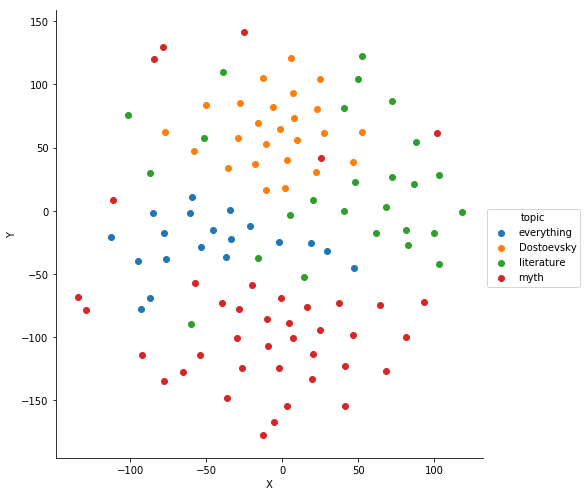

In [44]:
tsne_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : articles_df.topic})
sns.FacetGrid(tsne_df, hue="topic", size=7).map(plt.scatter, "X", "Y").add_legend()

В результате снижения размерности векторов текстов с помощью метода t-SNE по полученному отображению на плоскость можно видеть, что тексты коллекции кластеризуются в соответствии с темами. Некоторые статьи о литературе расположены близко к статьям о мифологии, и некоторые тексты, относящиеся к темам "Литература" и "Мифология" оказываются близкими к кластеру с текстами о Достоевском.